# An Introduction to Working with Dataframes
We used Pandas a bit in our work on visualizations. We are going to use a lot more Pandas from here on out. Before we get into some of the technical details of how Pandas works we are going to introduce you to some methods just so you can get a sense of why Pandas is such a good tool for working with data.

The specific dataframe methods we will use that we haven't covered before are:

* `shape`
* `head()`
* `tail()`
* `describe()`
* `transpose()`
* `sort_values()`
* `mean()`

We will also be using a few methods we have seen previously:

* `query()`
* `groupby()`

***
First, some imports and some code to make our charts look nicer.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
# For slightly nicer charts
plt.rcParams['figure.figsize'] = [10, 5]
plt.rcParams['figure.dpi'] = 150

***
Now we read a CSV file of quiz grades and assign it to a variable called `df`. This is the 'broadway' dataset we have been working with and it contains a column of dates that we want pandas to treat as dates so we are going to include an argument to treat the 'Full' column as a date. 

In [3]:
df = pd.read_csv("broadway.csv", parse_dates=["Full"])

At this point all we know is that we've succesfully read a CSV file. Let's find out some more about the data. First, let's find out how much data there is in the file. 

In [4]:
df.shape

(31296, 12)

`shape` is a list of two numbers (technically a "tuple," but it's a lot like a list) that represent the number of rows and the number of columns in your dataframe. The broadway data set has 31,296 rows (each representing one week of one show) and 12 columns.

It might be a good idea to get a look at our dataframe, but 31,296 rows seems like a bit much to look at all at once. We can look at just parts of the dataframe by using the dataframe methods `head()` and/or `tail()`.

In [5]:
df.head()

,Attendance,Capacity,Day,Full,Gross,Gross Potential,Month,Name,Performances,Theatre,Type,Year
0,5500,88,26,1990-08-26,134456,0,8,Tru,8,Booth,Play,1990
1,1737,100,24,1991-03-24,100647,0,3,Miss Saigon,0,Broadway,Musical,1991
2,12160,100,31,1991-03-31,634424,0,3,Miss Saigon,0,Broadway,Musical,1991
3,13921,100,7,1991-04-07,713353,0,4,Miss Saigon,0,Broadway,Musical,1991
4,10973,90,14,1991-04-14,573981,0,4,Miss Saigon,4,Broadway,Musical,1991


In [6]:
df.tail()

,Attendance,Capacity,Day,Full,Gross,Gross Potential,Month,Name,Performances,Theatre,Type,Year
31291,7234,87,14,2016-08-14,603770,62,8,The Humans,8,Schoenfeld,Play,2016
31292,13485,99,14,2016-08-14,2233894,97,8,The Lion King,8,Minskoff,Musical,2016
31293,10966,85,14,2016-08-14,999632,66,8,The Phantom Of The Opera,8,Majestic,Musical,2016
31294,8058,96,14,2016-08-14,990128,97,8,Waitress,8,Brooks Atkinson,Musical,2016
31295,13804,95,14,2016-08-14,1779664,100,8,Wicked,8,Gershwin,Musical,2016


`head()` returns first five rows by default, while `tail()` returns the last five rows.

We can pass an integer as an argument to `head()` or `tail()` to get more rows or fewer rows. 

In [7]:
df.head(15)

,Attendance,Capacity,Day,Full,Gross,Gross Potential,Month,Name,Performances,Theatre,Type,Year
0,5500,88,26,1990-08-26,134456,0,8,Tru,8,Booth,Play,1990
1,1737,100,24,1991-03-24,100647,0,3,Miss Saigon,0,Broadway,Musical,1991
2,12160,100,31,1991-03-31,634424,0,3,Miss Saigon,0,Broadway,Musical,1991
3,13921,100,7,1991-04-07,713353,0,4,Miss Saigon,0,Broadway,Musical,1991
4,10973,90,14,1991-04-14,573981,0,4,Miss Saigon,4,Broadway,Musical,1991
5,14076,101,21,1991-04-21,706793,0,4,Miss Saigon,8,Broadway,Musical,1991
6,14065,101,28,1991-04-28,714968,0,4,Miss Saigon,8,Broadway,Musical,1991
7,14064,101,5,1991-05-05,730765,0,5,Miss Saigon,8,Broadway,Musical,1991
8,13896,100,12,1991-05-12,766713,0,5,Miss Saigon,8,Broadway,Musical,1991
9,13738,99,19,1991-05-19,763332,0,5,Miss Saigon,8,Broadway,Musical,1991


One reason you want to look at your dataframe this way is because you want to make sure that it was read correctly. We have been giving you clean data that is read correctly. Real-world data will not always be read properly, and you need to know if it wasn't before you start working on your data analysis. Visually inspecting your data is one way to check to see if things are working. Another way would be to look at some summary statistics to see if anything looks odd.

Pandas has a nice dataframe method for looking at summary statistics called `describe()`.

In [8]:
df.describe()

,Attendance,Capacity,Day,Gross,Gross Potential,Month,Performances,Year
count,31296.000000,31296.000000,31296.000000,3.129600e+04,31296.000000,31296.000000,31296.000000,31296.000000
mean,8010.523006,80.738912,15.720859,5.960688e+05,62.404045,6.509043,7.224821,2005.875128
std,3189.873933,18.842815,8.817000,3.809796e+05,28.714589,3.430321,2.235376,6.100118
min,24.000000,10.000000,1.000000,1.037000e+03,0.000000,1.000000,0.000000,1990.000000
25%,5508.000000,70.000000,8.000000,3.201085e+05,45.000000,4.000000,8.000000,2001.000000
50%,7801.500000,83.000000,16.000000,5.145200e+05,63.000000,6.000000,8.000000,2006.000000
75%,10348.000000,95.000000,23.000000,7.852690e+05,82.000000,10.000000,8.000000,2011.000000
max,21631.000000,892.000000,31.000000,3.201333e+06,226.000000,12.000000,16.000000,2016.000000


This is great information, but it's a bit hard to read in this orientation. 

Dataframes have a method called `transpose()` that returns a new dataframe that is a flipped copy of the original (columns become rows and vice versa).  The `describe()` method returns a dataframe, so we can flip it by calling `.transpose()` on the result of `.describe()`:

In [9]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Attendance,31296.0,8010.523006,3189.873933,24.0,5508.0,7801.5,10348.0,21631.0
Capacity,31296.0,80.738912,18.842815,10.0,70.0,83.0,95.0,892.0
Day,31296.0,15.720859,8.817000,1.0,8.0,16.0,23.0,31.0
Gross,31296.0,596068.813682,380979.640655,1037.0,320108.5,514520.0,785269.0,3201333.0
Gross Potential,31296.0,62.404045,28.714589,0.0,45.0,63.0,82.0,226.0
Month,31296.0,6.509043,3.430321,1.0,4.0,6.0,10.0,12.0
Performances,31296.0,7.224821,2.235376,0.0,8.0,8.0,8.0,16.0
Year,31296.0,2005.875128,6.100118,1990.0,2001.0,2006.0,2011.0,2016.0


So what is all this?

* 'count' is the number of values for that variable. 
* 'mean' is the average. 
* 'std' is the standard deviation. We will talk about this later.
* 'min' in the minimum value out of all of the rows. 
* '25%', '50%', and '75%' are percentiles. We are going to skip these for now. 
* 'max' is the maximum value out of all of the rows. 

In this particular dataset 'count' is pretty boring. The count is the same for all of the variables and is equal to the number of rows, because every row in the dataset has some value for every variable. Later we will run into datasets where values are missing and the counts may vary quite a bit from variable to variable. 

If you are just getting to know your dataset, it's worth looking at the count, mean, min, and max to get a sense of things and to check that they are in a reasonable range. The maximum attendance in a month in this dataset is 21,631, that seems like a lot of people for one venue. You might remember we noticed some potentially odd data when we were looking at the Capacity column earlier, so it is worth looking into this to see if this Attendance number seems reasonable. One way we can do that is to plot a histogram of attendance.

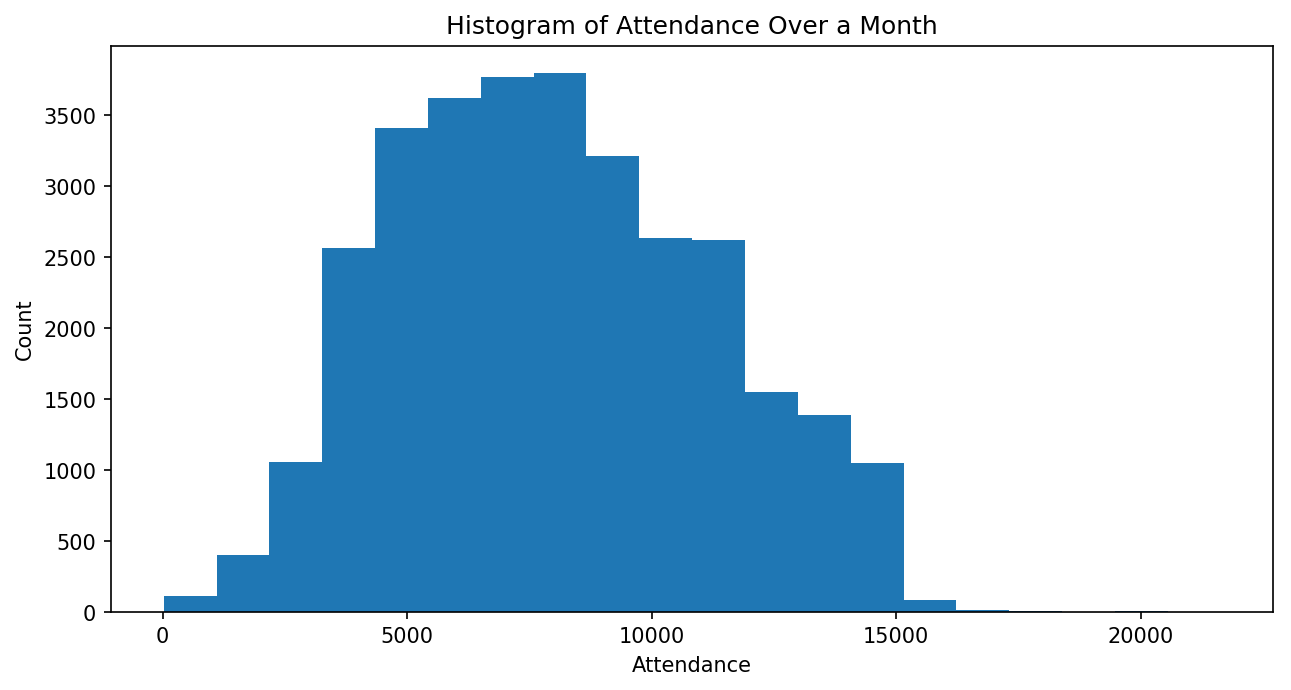

In [10]:
plt.hist(x="Attendance", data=df, bins=20)
plt.xlabel("Attendance")
plt.ylabel("Count")
plt.title("Histogram of Attendance Over a Month")
plt.show()

Now we have a sense on the Attendance data as a whole, but we can't see much about the highest range on this histogram. Let's use the `query()` method we used earlier to only look at Attendance counts above 16000.

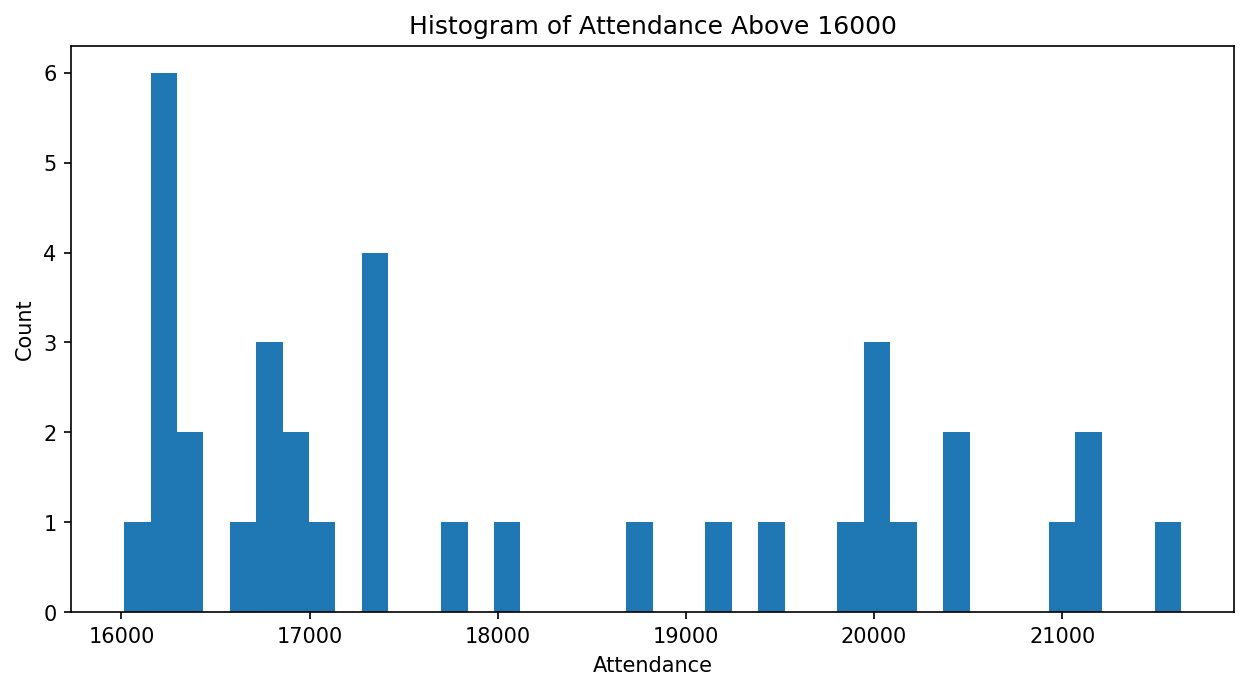

In [11]:
df_filtered_attend = df.query('Attendance > 16000')
plt.hist(x="Attendance", data=df_filtered_attend, bins=40)
plt.xlabel("Attendance")
plt.ylabel("Count")
plt.title("Histogram of Attendance Above 16000")
plt.show()

Our histogram indicates that anything above 16000 in attendance occurs fairly infrequently; But our 21631 max also isn't completely isolated. There have been other performances that get close to this number. Let's do some more digging. It might be interesting to know the top ten performanes in terms of attendance. 

The `sort_values()` dataframe method will help us do this.

In [12]:
df.sort_values(by='Attendance', ascending=False).head(20)

,Attendance,Capacity,Day,Full,Gross,Gross Potential,Month,Name,Performances,Theatre,Type,Year
1711,21631,100,29,1996-12-29,1315753,0,12,Dreams And Nightmares,16,Martin Beck,Special,1996
16336,21144,96,24,2006-12-24,1681661,94,12,Dr. Seuss' How The Grinch Stole Christmas!,12,Hilton Theatre,Musical,2006
16304,21133,96,17,2006-12-17,1699470,100,12,Dr. Seuss' How The Grinch Stole Christmas!,12,Hilton Theatre,Musical,2006
16272,20954,95,10,2006-12-10,1567295,91,12,Dr. Seuss' How The Grinch Stole Christmas!,12,Hilton Theatre,Musical,2006
17817,20425,80,16,2007-12-16,1572719,72,12,Dr. Seuss' How The Grinch Stole Christmas! 07,15,St. James,Musical,2007
1601,20391,95,1,1996-12-01,1250775,0,12,Dreams And Nightmares,0,Martin Beck,Special,1996
1684,20177,100,22,1996-12-22,1230342,0,12,Dreams And Nightmares,15,Martin Beck,Special,1996
1657,20034,99,15,1996-12-15,1213791,0,12,Dreams And Nightmares,15,Martin Beck,Special,1996
16366,20019,91,31,2006-12-31,1708885,90,12,Dr. Seuss' How The Grinch Stole Christmas!,12,Hilton Theatre,Musical,2006
17851,19982,78,23,2007-12-23,1645221,75,12,Dr. Seuss' How The Grinch Stole Christmas! 07,15,St. James,Musical,2007


We used the `sort_values()` method to sort our dataframe on the column titled 'Attendance', and we specified that we wanted the largest values at the top by using the `ascending=False` argument. Finally, we only returned the top 20 rows of the sorted dataframe using `head()` with the argument 20.

According to wikipedia the Martin Beck Theater (renamed in 2003 as the Al Hirshfeld Theatre) has a capacity of 1421. In December of 1996 our data indicates that 16 performances of "Dreams and Nightmares" were performed. 1421 * 16 = 22,736 which is just a bit above the reported Attendance. So all 16 showings were close to sold out. Our attendance number is unusually large, but it is also plausible and does not appear to be a data entry error. 

It's notable here that while 'Dreams and Nightmares' was the highest attended event, it was not the highest grossing. Let's sort the dataframe again and see what the highest grossing events are. 

In [13]:
df.sort_values(by='Gross', ascending=False).head(20)

,Attendance,Capacity,Day,Full,Gross,Gross Potential,Month,Name,Performances,Theatre,Type,Year
26997,17352,100,29,2013-12-29,3201333,121,12,Wicked,9,Gershwin,Musical,2013
25603,16281,100,30,2012-12-30,2947172,156,12,Wicked,9,Gershwin,Musical,2012
24057,17375,100,1,2012-01-01,2941794,133,1,Spider-Man Turn Off The Dark,9,Foxwoods,Musical,2012
30261,17119,99,3,2016-01-03,2940096,147,1,Wicked,9,Gershwin,Musical,2016
28626,16257,100,28,2014-12-28,2903309,154,12,Wicked,9,Gershwin,Musical,2014
28621,15306,100,28,2014-12-28,2885371,107,12,The Lion King,9,Minskoff,Musical,2014
30258,15198,100,3,2016-01-03,2878505,106,1,The Lion King,9,Minskoff,Musical,2016
26994,15307,100,29,2013-12-29,2837158,108,12,The Lion King,9,Minskoff,Musical,2013
27473,17352,100,20,2014-04-20,2769554,146,4,Wicked,9,Gershwin,Musical,2014
28662,15403,100,4,2015-01-04,2740642,163,1,Wicked,8,Gershwin,Musical,2015


Now that's a much different list. 

So let's do a bit more investigating to compare the highest grossing and the highest attendance performance in our dataset. Let's take a quick look at both using some of the new methods we've been working with.

In [14]:
df.sort_values(by='Attendance', ascending=False).head(20).describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Attendance,20.0,19414.65,1440.460536,17310.0,17938.50,19946.5,20399.50,21631.0
Capacity,20.0,91.45,9.242209,68.0,86.00,95.0,99.25,100.0
Day,20.0,16.00,10.597914,1.0,7.00,16.5,24.50,31.0
Gross,20.0,1704496.15,606900.713582,1023030.0,1299508.50,1570007.0,1701823.75,3201333.0
Gross Potential,20.0,69.15,45.893785,0.0,47.25,78.0,91.75,146.0
Month,20.0,10.45,3.691740,1.0,12.00,12.0,12.00,12.0
Performances,20.0,11.90,3.596782,0.0,11.25,12.0,15.00,16.0
Year,20.0,2005.25,6.171880,1996.0,2003.50,2006.0,2007.00,2015.0


In [15]:
df.sort_values(by='Gross', ascending=False).head(20).describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Attendance,20.0,15928.55,1017.512988,13570.0,15226.50,15830.0,16745.00,17375.0
Capacity,20.0,99.65,0.670820,98.0,99.75,100.0,100.00,100.0
Day,20.0,17.40,12.857109,1.0,3.00,23.5,29.00,31.0
Gross,20.0,2774785.15,161423.755857,2588075.0,2632609.25,2728816.0,2889855.50,3201333.0
Gross Potential,20.0,125.15,21.786705,98.0,106.75,122.0,143.75,163.0
Month,20.0,7.10,4.897905,1.0,2.50,7.5,12.00,12.0
Performances,20.0,8.90,0.307794,8.0,9.00,9.0,9.00,9.0
Year,20.0,2013.85,1.460894,2012.0,2012.75,2014.0,2015.00,2016.0


What we have done above is the following:
* sort the dataframe by our variable of interest (Attendance or Gross) using `sort_values()`
* return the first 20 entries of that sorted dataframe using `head()`
* return summary statistics on just those first 20 entries using `describe()`
* flip the final dataframe so its a bit more reader friendly using `transpose()`

There is a million dollar difference in the average weekly gross between the highest grossing and the highest attendance performances! Another interesting bit of information is the average year. The average year for the highest attendance was 2005.25 while the average year for the highest grossing was 2013.85

Let's take a closer look at trends in the mean by year for Gross and Attendance. We can do this by using the `groupby()` method and the `mean()` method.

In [16]:
df.groupby(by='Year').mean()

,Attendance,Capacity,Day,Gross,Gross Potential,Month,Performances
Year,,,,,,,
1990,5500.000000,88.000000,26.000000,134456.000000,0.000000,8.000000,8.000000
1991,13638.512195,100.560976,16.219512,747943.243902,0.000000,7.829268,7.317073
1992,11737.109589,92.698630,15.780822,578939.479452,21.219178,6.219178,7.575342
1993,10934.178947,94.326316,16.073684,486015.726316,39.168421,6.936842,7.789474
1994,10625.095808,84.502994,15.724551,500111.742515,12.700599,6.988024,7.251497
1995,9689.257908,85.489051,15.479319,481401.532847,19.257908,7.058394,7.194647
1996,7898.931071,81.667020,15.674443,373025.033934,2.153765,8.036055,7.152704
1997,7878.449254,80.773881,16.003731,377683.038806,40.375373,6.666418,7.237313
1998,8062.668286,79.968078,15.499653,399857.448994,71.199861,6.308119,7.353227


Looking though the means, we find the average weekly Attendance appears to have peaked in 1991, while the Gross peaked in 2013.

We can use some line charts to confirm this. To do so we are going to assign the dataframe we just made to a new variable called `df_means` and then use that data for our plots. We are also going to use `reset_index()` to make it easier to access the 'Year' column (don't worry about this for now).

In [17]:
df_means = df.groupby(by='Year').mean().reset_index()

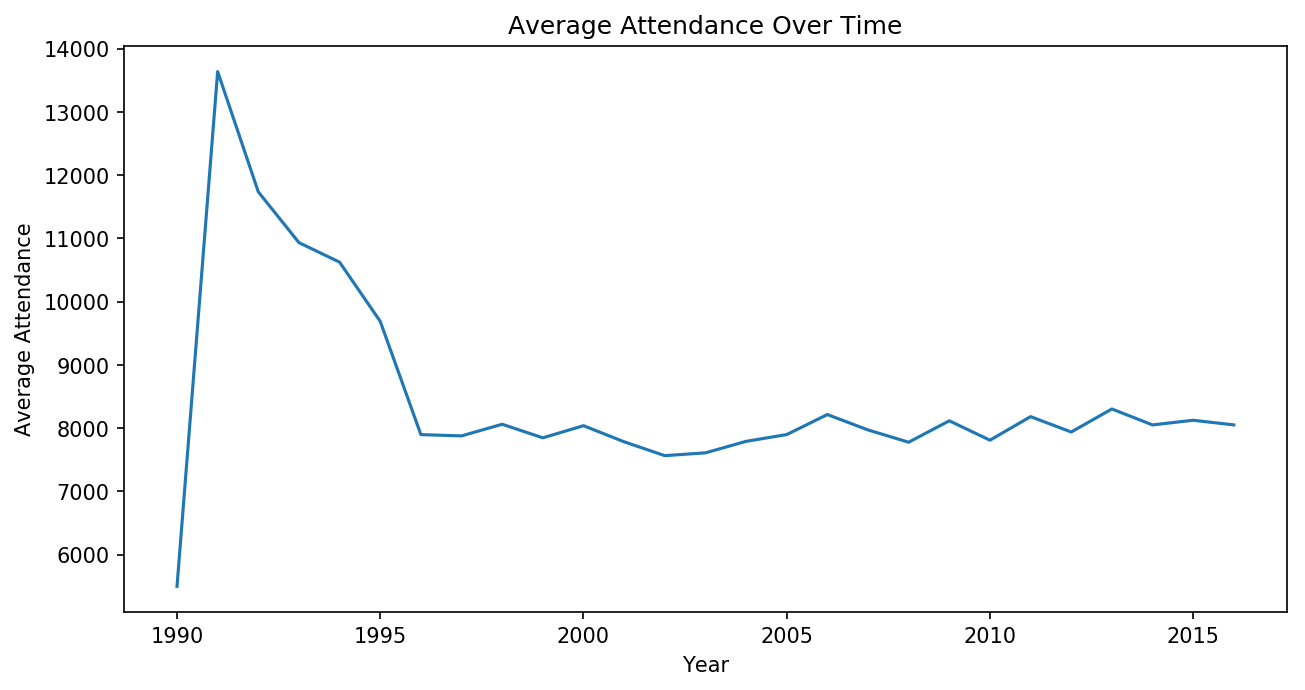

In [18]:
plt.plot('Year', 'Attendance', data=df_means)
plt.xlabel('Year')
plt.ylabel('Average Attendance')
plt.title('Average Attendance Over Time')
plt.show()

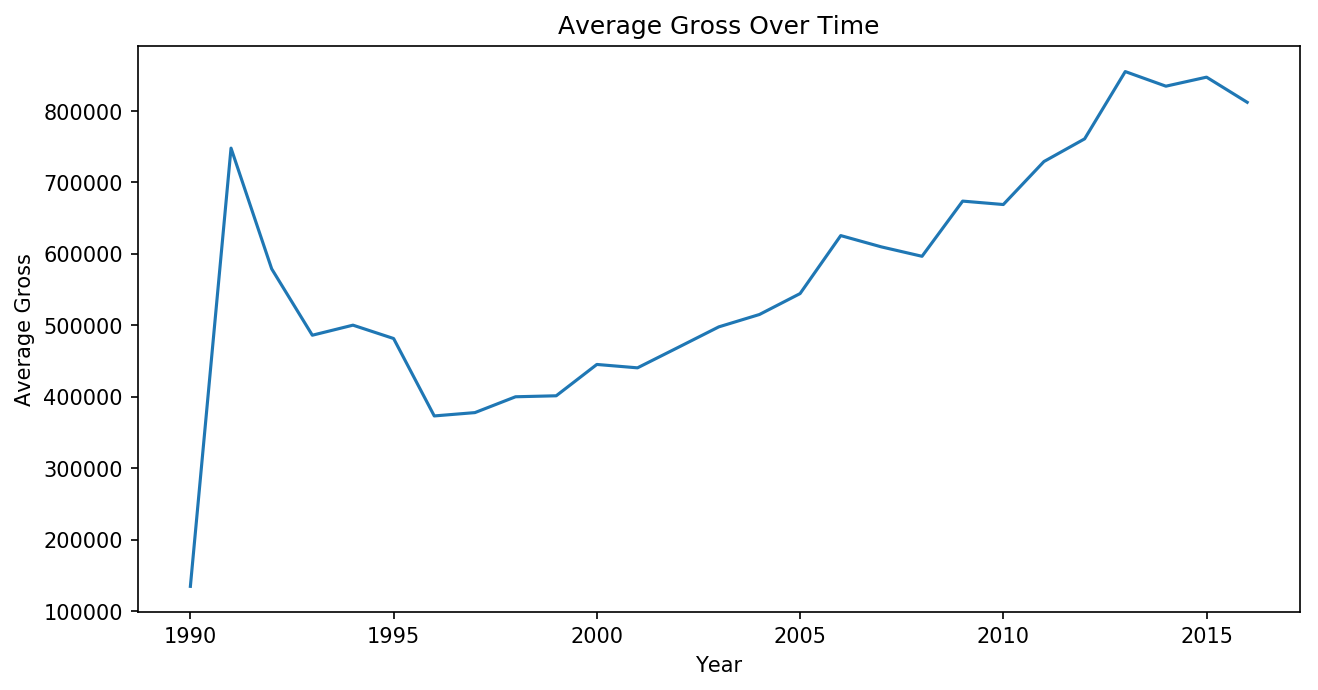

In [19]:
plt.plot('Year', 'Gross', data=df_means)
plt.xlabel('Year')
plt.ylabel('Average Gross')
plt.title('Average Gross Over Time')
plt.show()

So what do we make of all of this? Attendance appears to have peaked in the early 90's, declined rapidly thereafter, and then remained more or less remained steady ever since. Average gross revenue on the other hand peaked in the early 90's, declined thereafter, and has been steadily rising until 2013 when it started to plateau. 

Let's consider one more question. Does this pattern we've observed hold for both Musicals and Plays? 

In [20]:
df_musicals = df.query('Type == "Musical"')
df_musicals_means = df_musicals.groupby(by='Year').mean().reset_index()

df_plays = df.query('Type == "Play"')  
df_plays_means = df_plays.groupby(by='Year').mean().reset_index()

What does the above code do? Following a pattern we have used previously we:

* created two separate dataframes, one for play and one for musicals, by applying the `query()` method
* grouped the data by year by applying the `groupby()` method
* calculated means by applying the `mean()` method
* applied `reset_index()` to make the 'Year' column easier to work with

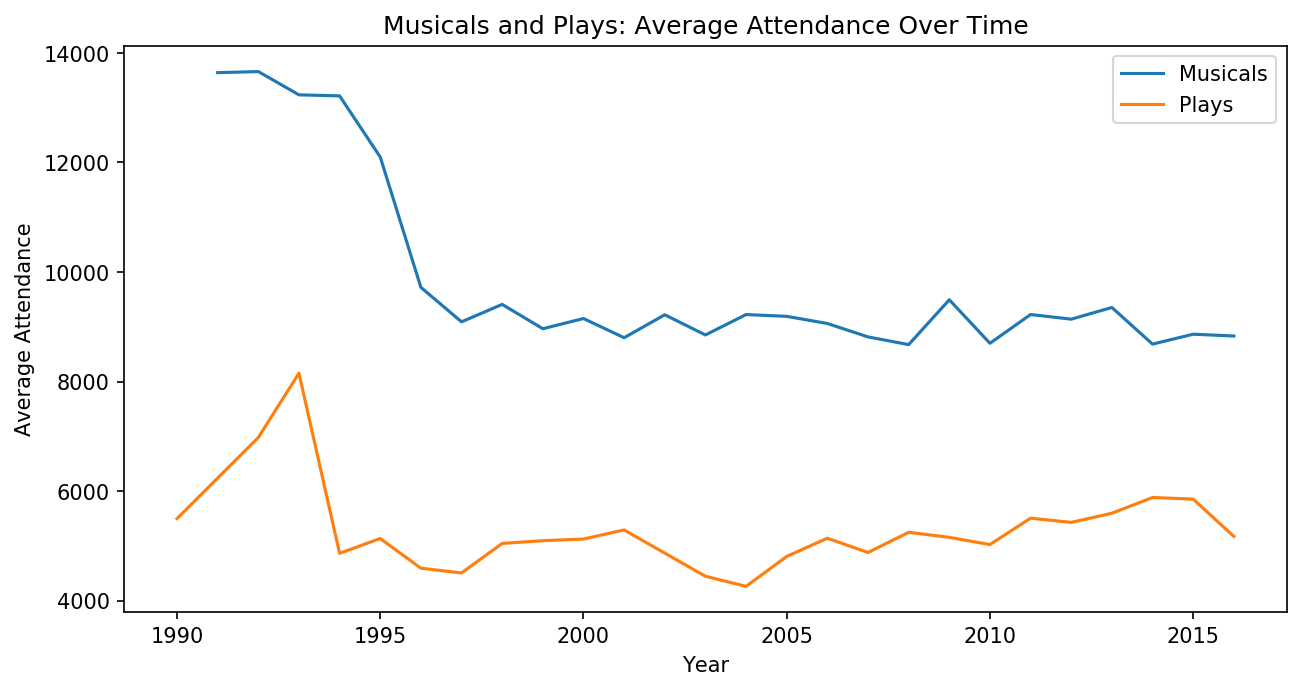

In [21]:
df_musicals = df.query('Type == "Musical"')
df_musicals_means = df_musicals.groupby(by='Year').mean().reset_index()

df_plays = df.query('Type == "Play"')  
df_plays_means = df_plays.groupby(by='Year').mean().reset_index()

plt.plot('Year', 'Attendance', data=df_musicals_means)
plt.plot('Year', 'Attendance', data=df_plays_means)
plt.xlabel('Year')
plt.ylabel('Average Attendance')
plt.title('Musicals and Plays: Average Attendance Over Time')
plt.legend(["Musicals", "Plays"])
plt.show()

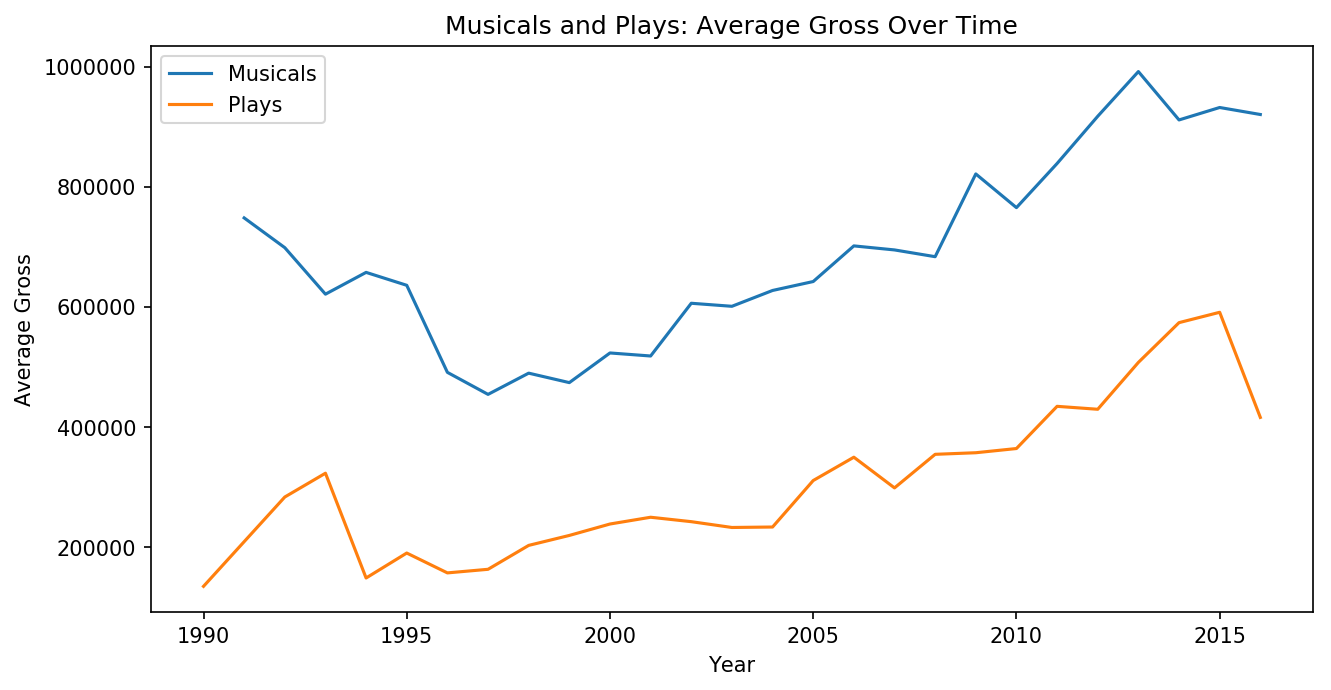

In [22]:
plt.plot('Year', 'Gross', data=df_musicals_means)
plt.plot('Year', 'Gross', data=df_plays_means)
plt.xlabel('Year')
plt.ylabel('Average Gross')
plt.title('Musicals and Plays: Average Gross Over Time')
plt.legend(["Musicals", "Plays"])
plt.show()  

It appears that while plays have lower attendance and gross revenue than musicals they have generally followed the same long-term trends. Both have shown typically shown stable attendance and increasing gross revenue since the year 2000. 